# Pytorch.Org Basics

Following tutorial on https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html.

**What is Pytorch?**

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for NumPy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed

## Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [1]:
from __future__ import print_function
import torch

Construct a 5x3 matrix, uninitialized:

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[ 0.0000e+00,  0.0000e+00,  1.1190e-34],
        [ 4.5855e-41,  2.5226e-18,  2.4148e-18],
        [ 2.6302e+20,  6.1949e-04,  2.5640e-09],
        [ 4.2004e-05,  3.1300e+12,  4.3356e-08],
        [ 1.0564e-05,  1.6596e-07,  1.2540e+16]])


Construct a randomly initialized matrix:

In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[ 0.1145,  0.7342,  0.3633],
        [ 0.1792,  0.4887,  0.6842],
        [ 0.5464,  0.6231,  0.3887],
        [ 0.8701,  0.6898,  0.8266],
        [ 0.0640,  0.0055,  0.4755]])


Construct a matrix filled zeros and of dtype long:

In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]])


Construct a tensor directly from data:

In [6]:
x = torch.tensor([5.5, 3])
print(x)

tensor([ 5.5000,  3.0000])


Or create a tensor based on an existing tensor. These methods will reuse properties of the input tensor, e.g. dtype, unless new values are provided by user

In [7]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], dtype=torch.float64)
tensor([[ 1.0224, -0.7714, -0.6128],
        [-0.7123,  0.0753,  1.4331],
        [ 0.8403, -2.0983, -0.0555],
        [-1.3996,  0.0433,  1.4846],
        [-0.7115, -0.3955, -1.7804]])


Get its size:

In [8]:
print(x.size())

torch.Size([5, 3])


## Operations

There are multiple syntaxes for operations. In the following example, we will take a look at the addition operation.

Addition: syntax 1

In [9]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 1.5688,  0.1266,  0.3106],
        [-0.3431,  0.6699,  2.1062],
        [ 1.5897, -1.2694, -0.0469],
        [-0.5223,  0.5431,  1.5090],
        [-0.0239,  0.4764, -0.9801]])


Syntax 2.

In [10]:
print(torch.add(x, y))

tensor([[ 1.5688,  0.1266,  0.3106],
        [-0.3431,  0.6699,  2.1062],
        [ 1.5897, -1.2694, -0.0469],
        [-0.5223,  0.5431,  1.5090],
        [-0.0239,  0.4764, -0.9801]])


Addition: providing an output tensor as argument

In [11]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.5688,  0.1266,  0.3106],
        [-0.3431,  0.6699,  2.1062],
        [ 1.5897, -1.2694, -0.0469],
        [-0.5223,  0.5431,  1.5090],
        [-0.0239,  0.4764, -0.9801]])


Addition: in-place

In [12]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 1.5688,  0.1266,  0.3106],
        [-0.3431,  0.6699,  2.1062],
        [ 1.5897, -1.2694, -0.0469],
        [-0.5223,  0.5431,  1.5090],
        [-0.0239,  0.4764, -0.9801]])


You can use standard NumPy-like indexing with all bells and whistles!

In [13]:
print(x[:, 1])

tensor([-0.7714,  0.0753, -2.0983,  0.0433, -0.3955])


Resizing: If you want to resize/reshape tensor, you can use torch.view:

In [14]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use .item() to get the value as a Python number

In [15]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-2.6240])
-2.6239917278289795


**Read later**

100+ Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc., are described at http://pytorch.org/docs/torch.

-----

## Autograd: automatic differentiation
    
Central to all neural networks in PyTorch is the `autograd` package. Let’s first briefly visit this, and we will then go to training our first neural network.

The `autograd` package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Let us see this in more simple terms with some examples.

### Tensor

`torch.Tensor` is the central class of the package. If you set its attribute `.requires_grad` as `True`, it starts to track all operations on it. When you finish your computation you can call `.backward()` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into `.grad` attribute.

To stop a tensor from tracking history, you can call `.detach()` to detach it from the computation history, and to prevent future computation from being tracked.

To prevent tracking history (and using memory), you can also wrap the code block in with `torch.no_grad()`:. This can be particularly helpful when evaluating a model because the model may have trainable parameters with `requires_grad=True`, but for which we don’t need the gradients.

There’s one more class which is very important for autograd implementation - a `Function`.

`Tensor` and `Function` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a `.grad_fn` attribute that references a Function that has created the `Tensor` (except for Tensors created by the user - their `grad_fn is None`).

If you want to compute the derivatives, you can call `.backward()` on a `Tensor`. If `Tensor` is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to `backward()`, however if it has more elements, you need to specify a `gradient` argument that is a tensor of matching shape.

In [16]:
import torch

Create a tensor and set `requires_grad=True` to track computation with it.

In [17]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


Do an operation of tensor:

In [18]:
y = x + 2
print(y)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


`y` was created as a result of an operation, so it has a `grad_fn`.

In [19]:
print(y.grad_fn)

Do more operations on y

In [20]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[ 27.,  27.],
        [ 27.,  27.]]) tensor(27.)


`.requires_grad_( ... )` changes an existing Tensor’s `requires_grad` flag in-place. The input flag defaults to `False` if not given.

In [21]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


### Gradients

Let’s backprop now because `out` contains a single scalar, `out.backward()` is equivalent to `out.backward(torch.tensor(1))`.

In [22]:
out.backward()

print gradients d(out)/dx

In [23]:
print(x.grad)

tensor([[ 4.5000,  4.5000],
        [ 4.5000,  4.5000]])


-----

## Neural Networks

Neural networks can be constructed using the `torch.nn` package.

Now that you had a glimpse of `autograd`, `nn` depends on `autograd` to define models and differentiate them. An `nn.Module` contains layers, and a method `forward(input)` that returns the `output`.

For example, look at this network that classifies digit images:

<img src="https://pytorch.org/tutorials/_images/mnist.png">

A typical training procedure for a neural network is as follows:

1. Define the neural network that has some learnable parameters (or weights)
2. Iterate over a dataset of inputs
3. Process input through the network
4. Compute the loss (how far is the output from being correct)
5. Propagate gradients back into the network’s parameters
6. Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

### Define Feed-Forward Network

Let’s define this feed-forward network:

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`. You can use any of the Tensor operations in the `forward` function.

The learnable parameters of a model are returned by net.parameters()

In [25]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


Let try a random 32x32 input Note: Expected input size to this net(LeNet) is 32x32. To use this net on MNIST dataset, please resize the images from the dataset to 32x32.

In [26]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0314, -0.0513,  0.0603, -0.0548,  0.1215,  0.0415, -0.0105,
         -0.0564,  0.0084, -0.0224]])


Zero the gradient buffers of all parameters and backprop with random gradients:

In [27]:
net.zero_grad()
out.backward(torch.randn(1, 10))

** Note **

`torch.nn` only supports mini-batches. The entire `torch.nn` package only supports inputs that are a mini-batch of samples, and not a single sample.

For example, `nn.Conv2d` will take in a 4D Tensor of nSamples x nChannels x Height x Width.

If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

At this point, we covered:
- Defining a neural network
- Processing inputs and calling backward

Still Left:
- Computing the loss
- Updating the weights of the network

### Loss Function

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

There are several different loss functions under the `nn` package . A simple loss is: `nn.MSELoss` which computes the mean-squared error between the input and the target.

For example:

In [28]:
output = net(input)
target = torch.randn(10) # a dummy target, for example
target = target.view(1, -1) # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5361)


Now, if you follow loss in the backward direction, using its `.grad_fn` attribute, you will see a graph of computations that looks like this:

``
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
``

So, when we call `loss.backward()`, the whole graph is differentiated w.r.t. the loss, and all Tensors in the graph that has `requires_grad=True` will have their `.grad` Tensor accumulated with the gradient.

For illustration, let us follow a few steps backward:

In [29]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

### Backprop

To backpropagate the error all we have to do is to `loss.backward()`. You need to clear the existing gradients though, else gradients will be accumulated to existing gradients.

Now we shall call `loss.backward()`, and have a look at conv1’s bias gradients before and after the backward.

In [30]:
net.zero_grad() # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([ 0.,  0.,  0.,  0.,  0.,  0.])
conv1.bias.grad after backward
tensor(1.00000e-02 *
       [-0.0867,  1.0500, -1.4665,  0.7694, -0.1954,  1.5665])


### Update the weights

The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):

`weight = weight - learning_rate * gradient`

We can implement this using simple python code:

In [31]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, we built a small package: `torch.optim` that implements all these methods. Using it is very simple:

In [33]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop
optimizer.zero_grad()              # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()                   # does the update

-----

## Example: Linear Regression

This follows a simple example from https://github.com/yunjey/pytorch-tutorial.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

Define model parameters

In [42]:
NUM_EPOCHS    = 80
LEARNING_RATE = 0.001

Create random toy data

In [36]:
x_train = np.linspace(0, 1, num = 100, dtype = np.float32) \
            .reshape(100, 1)
epsilon = np.random.normal(0, 1, size=100).astype('f') \
            .reshape(100, 1)
w = 2.0
b = 0.5
y_train = w * x_train + b + epsilon

Plot toy data

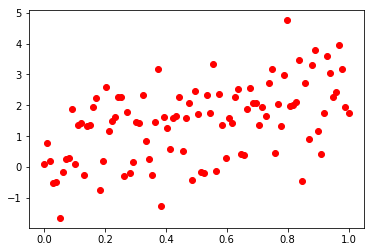

In [38]:
plt.plot(x_train, y_train, 'ro', label='Toy data')
plt.show()

Define a linear model (y = x AT + b) for input/output

In [39]:
model = nn.Linear(x_train.shape[1], y_train.shape[1])

Define loss and optimizer

In [43]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

Train the model

In [44]:
for epoch in range(NUM_EPOCHS):
    
    # Convert numpy arrays to torch tensors
    inputs  = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # FORWARD PASS
    outputs = model(inputs)
    loss    = criterion(outputs, targets)
    
    # BACKWARD AND OPTIMIZE
    # zero gradients (at the start of a minibatch)
    optimizer.zero_grad()
    # computes dloss/dx for every parameter x
    loss.backward()
    # optimizer.step performs a parameter update based on the current gradient 
    # (stored in .grad attribute of a parameter) 
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, loss.item()))

Epoch [10/80], Loss: 3.1049
Epoch [20/80], Loss: 3.0167
Epoch [30/80], Loss: 2.9329
Epoch [40/80], Loss: 2.8531
Epoch [50/80], Loss: 2.7773
Epoch [60/80], Loss: 2.7052
Epoch [70/80], Loss: 2.6366
Epoch [80/80], Loss: 2.5714


Plot the fitted line

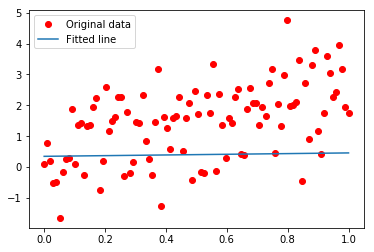

In [45]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

Check parameters

In [47]:
print('w:', model.weight) 
print('b:', model.bias)

w: Parameter containing:
tensor([[ 0.1103]])
b: Parameter containing:
tensor([ 0.3495])


And optionally save model checkpoint

In [ ]:
# torch.save(model.state_dict(), 'model.ckpt')